# Lecture 6

## Dimensionality reduction

Loading 20 News Groups:

In [1]:
from sklearn.datasets import fetch_20newsgroups


cats = ['sci.space', 'talk.politics.guns', 'comp.graphics', 'rec.autos', 'alt.atheism']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers', 'footers', 'quotes'), shuffle = True)
data = newsgroups_train.data

Vectorizing the data using Tf-idf:

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vect = TfidfVectorizer(min_df =5, stop_words = 'english')
X = vect.fit_transform(data)
X.shape

(2797, 6497)

Running LSA with 50 components:

In [6]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(50)
Z = lsa.fit_transform(X)
Z.shape

(2797, 50)

We can access to the components:

In [7]:
print(lsa.components_.shape)
lsa.components_

(50, 6497)


array([[ 0.01704248,  0.03684162,  0.00588748, ...,  0.00600745,
         0.00883079,  0.00157385],
       [ 0.01789592, -0.01131437,  0.00863117, ...,  0.00122107,
         0.02232187,  0.00123815],
       [ 0.00705201,  0.02534256,  0.00963355, ...,  0.007903  ,
        -0.01358207,  0.00299649],
       ..., 
       [-0.00848706,  0.08550876, -0.00611421, ...,  0.01129752,
         0.01816399,  0.00178488],
       [ 0.03308465,  0.0740148 ,  0.00420853, ...,  0.00537673,
        -0.00689568,  0.00022311],
       [-0.00399391, -0.03179085,  0.00266049, ..., -0.00346489,
        -0.00930595,  0.00315822]])

Let's print top features per component. It is better to use absolute value of components:

In [12]:
vocab = np.array(vect.get_feature_names())

for i in range(Z.shape[1]):
    order = np.abs(lsa.components_[i].argsort())[::-1]
    print(vocab[order[:8]])

['don' 'people' 'just' 'like' 'think' 'know' 'car' 'space']
['thanks' 'space' 'graphics' 'files' 'image' 'program' 'file' 'ftp']
['space' 'nasa' 'launch' 'shuttle' 'orbit' 'moon' 'lunar' 'earth']
['car' 'cars' 'dealer' 'engine' 'new' 'price' 'speed' 'like']
['god' 'car' 'atheism' 'space' 'atheists' 'belief' 'bible' 'believe']
['com' 'ico' 'tek' 'bobbe' 'beauchaine' 'sank' 'bronx' 'manhattan']
['just' 'don' 'think' 'graphics' 'people' 'like' 'know' 'lot']
['thanks' 'know' 'space' 'advance' 'mail' 'does' 'right' 'anybody']
['graphics' 'edu' 'fbi' 'comp' 'book' 'koresh' 'batf' 'news']
['fbi' 'files' 'file' 'batf' 'koresh' 'image' 'compound' 'people']
['file' 'edu' 'car' 'files' 'people' 'space' 'don' 'nasa']
['people' 'right' 'militia' 'car' 'thanks' 'software' 'life' 'government']
['just' 'right' 'god' 'militia' 'does' 'card' 'government' 'windows']
['card' 'space' 'vesa' 'mode' 'windows' 'driver' 'vga' 'video']
['space' 'graphics' 'car' 'group' 'file' 'book' 'comp' 'files']
['know' 'doe

Lets look at at low dimension:

In [16]:
Z

array([[ 0.14439162, -0.03566937, -0.02651469, ...,  0.01913644,
        -0.02640809, -0.0450096 ],
       [ 0.07646217, -0.04215896,  0.00351482, ...,  0.06312033,
         0.02484236, -0.0875196 ],
       [ 0.07530035,  0.002122  ,  0.00417379, ..., -0.01528025,
        -0.05287871,  0.00231739],
       ..., 
       [ 0.15335207, -0.0278975 , -0.01684388, ..., -0.04256078,
        -0.03430973,  0.02038234],
       [ 0.03133505, -0.03549254, -0.00130973, ...,  0.06540488,
        -0.049976  , -0.03072308],
       [ 0.1101559 , -0.03058157, -0.04417586, ..., -0.05511181,
        -0.05708893,  0.02894616]])

Verifying this formula: Z = X W^T

In [21]:
X.dot(lsa.components_.T)

array([[ 0.14439162, -0.03566937, -0.02651469, ...,  0.01913644,
        -0.02640809, -0.0450096 ],
       [ 0.07646217, -0.04215896,  0.00351482, ...,  0.06312033,
         0.02484236, -0.0875196 ],
       [ 0.07530035,  0.002122  ,  0.00417379, ..., -0.01528025,
        -0.05287871,  0.00231739],
       ..., 
       [ 0.15335207, -0.0278975 , -0.01684388, ..., -0.04256078,
        -0.03430973,  0.02038234],
       [ 0.03133505, -0.03549254, -0.00130973, ...,  0.06540488,
        -0.049976  , -0.03072308],
       [ 0.1101559 , -0.03058157, -0.04417586, ..., -0.05511181,
        -0.05708893,  0.02894616]])

## Using PCA:

In [22]:
from sklearn.decomposition import PCA

pca = PCA(50)
Z = pca.fit_transform(X)
Z.shape

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

PCA does not support sparse matrix, let's change it to the dense matrix:

In [23]:
Z = pca.fit_transform(X.todense())
Z.shape

(2797, 50)

Printing components:

In [24]:
print(pca.components_.shape)
pca.components_

(50, 6497)


array([[ 0.01411341, -0.02324988,  0.00696027, ..., -0.00053713,
         0.01868221,  0.00039864],
       [ 0.00905452,  0.0318483 ,  0.01047114, ...,  0.00854942,
        -0.00645474,  0.0035524 ],
       [ 0.0234697 ,  0.03455881,  0.00063371, ...,  0.00219892,
        -0.01304935, -0.00182879],
       ..., 
       [ 0.00241384,  0.0604757 ,  0.00666983, ...,  0.00485516,
         0.02300655,  0.00144835],
       [-0.0031401 , -0.05853803, -0.0175989 , ...,  0.00364943,
         0.0021521 , -0.00082816],
       [ 0.02827372, -0.0313904 ,  0.00266965, ...,  0.00711875,
        -0.02733812,  0.0007273 ]])

Prining top features per components:

In [29]:
for i in range(Z.shape[1]):
    order = np.abs(pca.components_[i]).argsort()[::-1]
    print(vocab[order[:8]])

['people' 'thanks' 'gun' 'don' 'graphics' 'think' 'files' 'god']
['space' 'nasa' 'car' 'thanks' 'shuttle' 'launch' 'moon' 'earth']
['car' 'god' 'cars' 'people' 'engine' 'dealer' 'atheism' 'graphics']
['gun' 'god' 'guns' 'graphics' 'people' 'don' 'thanks' 'file']
['god' 'car' 'just' 'don' 'gun' 'know' 'like' 'think']
['com' 'ico' 'tek' 'bobbe' 'bronx' 'manhattan' 'sank' 'beauchaine']
['god' 'just' 'car' 'gun' 'think' 'don' 'does' 'atheism']
['thanks' 'know' 'image' 'space' 'advance' 'graphics' 'does' 'mail']
['graphics' 'edu' 'does' 'files' 'know' 'file' 'comp' 'group']
['gun' 'people' 'fbi' 'file' 'files' 'car' 'graphics' 'batf']
['edu' 'just' 'file' 'files' 'gun' 'software' 'space' 'graphics']
['fbi' 'people' 'right' 'koresh' 'know' 'god' 'batf' 'gas']
['just' 'don' 'think' 'right' 'god' 'militia' 'post' 've']
['thanks' 'card' 'vesa' 'mode' 'space' 'just' 'windows' 'driver']
['know' 'does' 'space' 'software' 'stuff' 'don' 'post' 'deleted']
['graphics' 'edu' 'does' 'space' 'software' '

## Clustering using k-means

In [44]:
from sklearn.cluster import KMeans, MiniBatchKMeans


Training the clustering algorithm with 5 clusters:

In [49]:
kmeans = KMeans(5)
clusters = kmeans.fit_predict(X)
clusters

array([2, 0, 0, ..., 2, 0, 4])

Cluster distibution:

In [50]:
np.bincount(clusters)

array([1218,  251,  309,  382,  637], dtype=int64)

Plotting the histogram:

(array([ 1218.,     0.,   251.,     0.,     0.,   309.,     0.,   382.,
            0.,   637.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

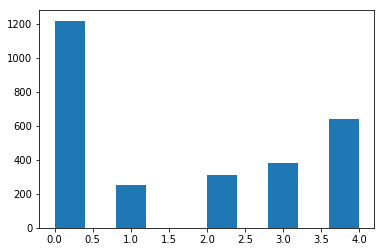

In [51]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(clusters)

Printing the inertia:

In [52]:
kmeans.inertia_

2631.8705485464425

Printing centeriods:

In [53]:
print(kmeans.cluster_centers_.shape)
kmeans.cluster_centers_

(5, 6497)


array([[  2.20727394e-03,   1.48552268e-03,   9.46490191e-04, ...,
          8.30750153e-04,   1.64819642e-04,   0.00000000e+00],
       [  5.38122980e-03,   5.80416438e-03,   2.18114455e-03, ...,
          2.26492692e-03,   0.00000000e+00,   1.07266517e-03],
       [  4.49354493e-03,   7.57225681e-03,   0.00000000e+00, ...,
          4.58327405e-04,   7.88393284e-04,   0.00000000e+00],
       [  2.55039997e-03,   8.49210698e-04,   1.19264357e-03, ...,
          2.37607869e-04,   6.22068144e-03,   9.89259443e-06],
       [  4.76113167e-04,   8.26563997e-03,   4.15135417e-04, ...,
          5.44362441e-04,   6.17527292e-04,   1.79702955e-04]])

### Finding best number of clusters with elbow method:

Finding inertia for different number of clusters:

In [54]:
inertia = []

vect = TfidfVectorizer(min_df = 20, stop_words = 'english')
X = vect.fit_transform(data)
print(X.shape)

for i in range(2, 15):
    kmeans = KMeans(i)
    kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    
print(inertia)

(2797, 1769)
[2620.1028645789, 2606.8109365431033, 2594.564915465344, 2582.3768544976547, 2571.986292445937, 2566.939479622204, 2557.417362207412, 2552.089789368247, 2544.335955056231, 2537.7724722152775, 2537.560456979149, 2531.218466952859, 2524.3609271695536]


Plotting the result:

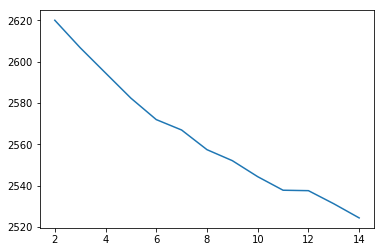

In [56]:
%matplotlib inline

plt.plot(range(2, 15), inertia)

## Clustering in low dimension:

In [57]:
vect = TfidfVectorizer(min_df = 3, stop_words = 'english')
X = vect.fit_transform(data)

lsa = TruncatedSVD(100)
Z = lsa.fit_transform(X)

kmeans = KMeans(5)
clusters = kmeans.fit_predict(Z)

np.bincount(clusters)

array([1403,  176,  292,  588,  338], dtype=int64)

(array([ 1403.,     0.,   176.,     0.,     0.,   292.,     0.,   588.,
            0.,   338.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

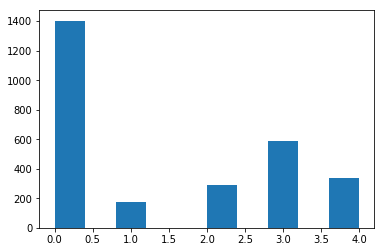

In [58]:
%matplotlib inline

plt.hist(clusters)

Clustering with different number of clusters:

In [59]:
inertia = []
for i in range(2, 30):
    kmeans = KMeans(i, n_jobs = 4)
    kmeans.fit_predict(Z)
    inertia.append(kmeans.inertia_)
    
print(inertia)

[439.76736815249291, 432.11643036648985, 423.70501034930425, 416.90717593074311, 409.35559494144752, 405.35149152431677, 403.38897098814874, 396.0809111448342, 393.20391021485347, 386.88196327890296, 384.38812025026084, 381.22776478776723, 375.43219573806596, 373.5300545430037, 370.15046435872853, 367.4030997996004, 364.11885641128356, 360.8347920181489, 358.88974014837953, 355.38589171607089, 352.97801709926415, 350.7083340470225, 347.23761127181308, 343.35538473557341, 341.42409146969317, 338.01346743464427, 337.22214522539207, 333.80853225307339]


Creating a plot and estimating best number of clusters

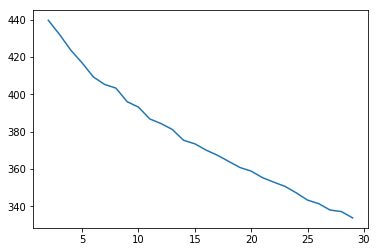

In [60]:
%matplotlib inline

plt.plot(range(2, 30), inertia)

Word clustering:

In [70]:
lsa = TruncatedSVD(200)
Z = lsa.fit_transform(X)
Z.shape

(2797, 200)

In [71]:
lsa.components_.shape

(200, 9991)

In [72]:
kmeans = KMeans(5)

WordClustering = kmeans.fit_predict(lsa.components_.T)
np.bincount(WordClustering)

array([  77,   17,   34, 9859,    4], dtype=int64)

array([9822,   16,  147,    5,    1], dtype=int64)